# Análise exploratória com o dataset Iris
Notebook criado para servir como base para outras análises exploratórias
###### Dataset Iris: https://www.kaggle.com/datasets/uciml/iris?resource=download
#### DEV: Igor Matheus Lial Venturin

In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

### Lendo o arquivo CVS com os dados

In [3]:
tabela = pd.read_csv('D:\Estudos\Python\Análise Exploratória\Iris\Iris.csv')
display(tabela)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Mudando o nome das colunas

In [4]:
tabela.columns = ['Id', 'Comprimento Sépala(Cm)', 'Largura Sépala(Cm)', 'Comprimento Pétala(Cm)', 'Largura Pétala(Cm)', 'Espécies']
display(tabela)

,Id,Comprimento Sépala(Cm),Largura Sépala(Cm),Comprimento Pétala(Cm),Largura Pétala(Cm),Espécies
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Removendo uma coluna

In [5]:
tabela = tabela.drop(['Id'] , axis = 1)
display(tabela)

,Comprimento Sépala(Cm),Largura Sépala(Cm),Comprimento Pétala(Cm),Largura Pétala(Cm),Espécies
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### informaçõe básicas sobre a tabela

In [6]:
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Comprimento Sépala(Cm)  150 non-null    float64
 1   Largura Sépala(Cm)      150 non-null    float64
 2   Comprimento Pétala(Cm)  150 non-null    float64
 3   Largura Pétala(Cm)      150 non-null    float64
 4   Espécies                150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


### Para saber o nome de todas as colunas da minha tabela

In [7]:
tabela.columns

Index(['Comprimento Sépala(Cm)', 'Largura Sépala(Cm)',
       'Comprimento Pétala(Cm)', 'Largura Pétala(Cm)', 'Espécies'],
      dtype='object')

### Duplicadas - De todas as amostragens existem apenas 3 que possuem exatamente as mesmas dimensões que outra

In [8]:
tabela.duplicated().sum()

3

### Verificando se existe algum "Not a Number" em cada coluna

In [9]:
tabela.isna().sum()

Comprimento Sépala(Cm)    0
Largura Sépala(Cm)        0
Comprimento Pétala(Cm)    0
Largura Pétala(Cm)        0
Espécies                  0
dtype: int64

### Excluir as colunas completamente vazias
OBS: how pode ser = "all" (onde ele vai excluir as colunas que são completamente vazias) e "any" (onde irá excluir as colunas que tiverem pelo menos uma linha vaiza)

In [10]:
#Excluir as colunas completamente vazias
tabela = tabela.dropna(how = "all" , axis = 1)

#Excluir linhas aonde pelo menos um valor é vazio
tabela = tabela.dropna(how = "any" , axis = 0)

### Sumário estatistico com os respectivos dados: 
Quantidade de dados(linhas), Média, Desvio Padrão, Valor Mínimo, 1 Quartil, 2 Quartil (Mediana), 3 Quartil, Valor Máximo.

In [11]:
tabela.describe()

,Comprimento Sépala(Cm),Largura Sépala(Cm),Comprimento Pétala(Cm),Largura Pétala(Cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Inclui as estatisticas para cada coluna e inclui dados como:
A quantidade de valores únicos; os valores que mais apareceram e a frequência com que apareceu.

In [12]:
tabela.describe(include = 'all')

,Comprimento Sépala(Cm),Largura Sépala(Cm),Comprimento Pétala(Cm),Largura Pétala(Cm),Espécies
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


### Valores únicos

In [13]:
#Quantidade de valores únicos em cada coluna
print(tabela.nunique())

#Mostrando quais são esses valores únicos
print("\n",tabela['Espécies'].unique())

Comprimento Sépala(Cm)    35
Largura Sépala(Cm)        23
Comprimento Pétala(Cm)    43
Largura Pétala(Cm)        22
Espécies                   3
dtype: int64

 ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### Contagem de valores

In [14]:
#Após descobrir que possuimos apenas 3 espécies, queremos descobrir quantas amostras cada uma possui
print(tabela['Espécies'].value_counts())

#Para saber também a porcentagem de cada amostra
print(tabela['Espécies'].value_counts(normalize = True).map("{:.1%}".format)) # <--- formatação do texto para %

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Espécies, dtype: int64
Iris-setosa        33.3%
Iris-versicolor    33.3%
Iris-virginica     33.3%
Name: Espécies, dtype: object


### Para Vizualizar minha tabela na ordem crescente:
Primeiro deve-se definir por quais colunas eu quero ordenar, se apenas por uma ou por varias, nesse caso eu coloquei por todas para conseguirmos ver quais são as maiores e as menores amostras


In [15]:
ordenar = ['Comprimento Sépala(Cm)', 'Largura Sépala(Cm)',
       'Comprimento Pétala(Cm)', 'Largura Pétala(Cm)']

#Para vizualiza do menor para o maior ascending = True
tabela = tabela.sort_values(by = ordenar, ascending = False).reset_index(drop = True) # <--- Para excluir a coluna de index que foi criada aleatoriamente
display(tabela)

,Comprimento Sépala(Cm),Largura Sépala(Cm),Comprimento Pétala(Cm),Largura Pétala(Cm),Espécies
0,7.9,3.8,6.4,2.0,Iris-virginica
1,7.7,3.8,6.7,2.2,Iris-virginica
2,7.7,3.0,6.1,2.3,Iris-virginica
3,7.7,2.8,6.7,2.0,Iris-virginica
4,7.7,2.6,6.9,2.3,Iris-virginica
...,...,...,...,...,...
145,4.5,2.3,1.3,0.3,Iris-setosa
146,4.4,3.2,1.3,0.2,Iris-setosa
147,4.4,3.0,1.3,0.2,Iris-setosa
148,4.4,2.9,1.4,0.2,Iris-setosa


### Para saber a média de todos as colunas 

In [16]:
medidas = ['Comprimento Sépala(Cm)', 'Largura Sépala(Cm)',
       'Comprimento Pétala(Cm)', 'Largura Pétala(Cm)']
tabela['Média Medidas'] = tabela[medidas].mean(axis = 1)
display(tabela)

,Comprimento Sépala(Cm),Largura Sépala(Cm),Comprimento Pétala(Cm),Largura Pétala(Cm),Espécies,Média Medidas
0,7.9,3.8,6.4,2.0,Iris-virginica,5.025
1,7.7,3.8,6.7,2.2,Iris-virginica,5.100
2,7.7,3.0,6.1,2.3,Iris-virginica,4.775
3,7.7,2.8,6.7,2.0,Iris-virginica,4.800
4,7.7,2.6,6.9,2.3,Iris-virginica,4.875
...,...,...,...,...,...,...
145,4.5,2.3,1.3,0.3,Iris-setosa,2.100
146,4.4,3.2,1.3,0.2,Iris-setosa,2.275
147,4.4,3.0,1.3,0.2,Iris-setosa,2.225
148,4.4,2.9,1.4,0.2,Iris-setosa,2.225


### Para garantir que as colunas de dados estão no formato correto ( int64, float64 , object, text ... etc)
O parametro errors = "coerce" (transforma o valor em NaN) = "raise" (deixa dar erro) = "ignore" (ignora o erro e entrega o mesmo valor)

In [17]:
numéricos = ['Comprimento Sépala(Cm)', 'Largura Sépala(Cm)',
       'Comprimento Pétala(Cm)', 'Largura Pétala(Cm)', 'Média Medidas']
for i in numéricos:
    tabela[i] = pd.to_numeric(tabela[i], errors = "coerce")


### Consultas com parametros ( 3 formas diferentes com o mesmo resultado)

In [18]:
tabela[(tabela['Comprimento Sépala(Cm)'] >= 7) & (tabela['Comprimento Pétala(Cm)'] >= 6)]
tabela.loc[(tabela['Comprimento Sépala(Cm)'] >= 7) & (tabela['Comprimento Pétala(Cm)'] >= 6)]
tabela.query('(`Comprimento Sépala(Cm)` >= 7 ) & (`Comprimento Pétala(Cm)` >= 6)')

,Comprimento Sépala(Cm),Largura Sépala(Cm),Comprimento Pétala(Cm),Largura Pétala(Cm),Espécies,Média Medidas
0,7.9,3.8,6.4,2.0,Iris-virginica,5.025
1,7.7,3.8,6.7,2.2,Iris-virginica,5.100
2,7.7,3.0,6.1,2.3,Iris-virginica,4.775
3,7.7,2.8,6.7,2.0,Iris-virginica,4.800
4,7.7,2.6,6.9,2.3,Iris-virginica,4.875
5,7.6,3.0,6.6,2.1,Iris-virginica,4.825
6,7.4,2.8,6.1,1.9,Iris-virginica,4.550
7,7.3,2.9,6.3,1.8,Iris-virginica,4.575
8,7.2,3.6,6.1,2.5,Iris-virginica,4.850
9,7.2,3.2,6.0,1.8,Iris-virginica,4.550


### Agrupamento para vizualizar de forma mais clara alguns valores

In [19]:
tabela.groupby(by = 'Espécies')[medidas].agg([np.mean, np.median]).T # <--- O "T" é para transpor o valor


Espécies                       Iris-setosa  Iris-versicolor  Iris-virginica
Comprimento Sépala(Cm) mean          5.006            5.936           6.588
                       median        5.000            5.900           6.500
Largura Sépala(Cm)     mean          3.418            2.770           2.974
                       median        3.400            2.800           3.000
Comprimento Pétala(Cm) mean          1.464            4.260           5.552
                       median        1.500            4.350           5.550
Largura Pétala(Cm)     mean          0.244            1.326           2.026
                       median        0.200            1.300           2.000

### Criando agrupamento por média

In [20]:
médias = tabela.groupby(by = 'Espécies')[medidas].agg([np.mean]).T
display(médias)

,Espécies,Iris-setosa,Iris-versicolor,Iris-virginica
Comprimento Sépala(Cm),mean,5.006,5.936,6.588
Largura Sépala(Cm),mean,3.418,2.770,2.974
Comprimento Pétala(Cm),mean,1.464,4.260,5.552
Largura Pétala(Cm),mean,0.244,1.326,2.026


### Criando gráficos para melhor vizualização dos tamanhos médios de cada espécie

,Espécies,Iris-setosa,Iris-versicolor,Iris-virginica
Comprimento Sépala(Cm),mean,5.006,5.936,6.588
Largura Sépala(Cm),mean,3.418,2.770,2.974
Comprimento Pétala(Cm),mean,1.464,4.260,5.552
Largura Pétala(Cm),mean,0.244,1.326,2.026


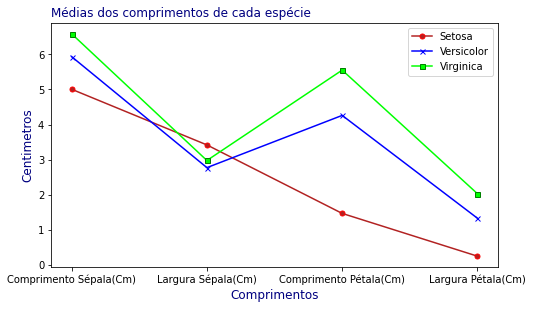

In [21]:
#Definindo o tamanhao das plotagens
plt.rcParams["figure.figsize"] = (8, 4.5)

# 1 - Criando o Eixo X
Eixo_X = ['Comprimento Sépala(Cm)', 'Largura Sépala(Cm)',
       'Comprimento Pétala(Cm)', 'Largura Pétala(Cm)']

# 2 - Criando o valores do Eixo Y
médias = tabela.groupby(by = 'Espécies')[medidas].agg([np.mean]).T
display(médias)

Y_setosa = médias['Iris-setosa']
Y_versicolor = médias['Iris-versicolor']
Y_virginica = médias['Iris-virginica']

#3 - Fazendo a Plotagem das 3 linhas
plt.plot(Eixo_X, Y_setosa, color = 'firebrick', marker = 'o', ms = 5, mec = 'r')
plt.plot(Eixo_X, Y_versicolor , color = 'blue', marker = 'x', ms = 5, mec = 'b')
plt.plot(Eixo_X, Y_virginica , color = 'lime', marker = 's', ms = 5, mec = 'g')

#4 - Ajustando os rótulos e legendas
plt.xlabel('Comprimentos', color = 'navy', size = 12)
plt.ylabel('Centimetros', color = 'navy', size = 12)
plt.title('Médias dos comprimentos de cada espécie' , loc = 'left', color = 'navy', size = 12)
plt.legend(["Setosa","Versicolor", "Virginica"])